In [ ]:

#Objectives
#1. Load and preprocess the dataset
#2. Inspect the data for empty values, wrong datatypes, wrong formats, duplicates and outliers
#3. Analyse the data to find patterns and relationships
#4. Visualize the data to understand trends and distributions
#5. Evaluate the model performance using appropriate metrics
#6. Identify patterns and correlations.
#7. Save the cleaned and processed data for future use



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [36]:
# Load the dataset
df = pd.read_csv('climate_action_data.csv')

In [37]:
# Intial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [38]:
# More intial inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [39]:
# Handling bad data:  empty cells/values, wrong data, wrong formats, duplicates, and outliers
# Empty values
# Check for missing values or null values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [46]:
# Handle missing values
# For numerical columns, we can fill missing values with the mean or median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        #df[col] = df[col].fillna(df[col].median())
        
# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())
        

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [16]:
df.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [47]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# For remaining missing dates, fill with mode
if df['Date'].isnull().sum() > 0:
    # Fill with mode date
    mode_date = df['Date'].mode()[0]
    df['Date'] = df['Date'].fillna(mode_date)

In [48]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning:")
print(df.dtypes)


Missing values after cleaning:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Data types after cleaning:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [28]:
# Wrong Data Types
num_cols = ['Soil_Moisture', 'Soil_pH', 'Temperature', 'Humidity', 'Fertilizer_Recommended', 'Irrigation_Recommended']
for col in num_cols:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

In [20]:

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [21]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 4


(798, 10)

In [22]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      798 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               793 non-null    float64       
 3   Soil_pH                        798 non-null    float64       
 4   Temperature(C)                 793 non-null    float64       
 5   Humidity(%)                    793 non-null    float64       
 6   Crop_Type                      798 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  793 non-null    float64       
 8   Irrigation_Recommended(mm)     793 non-null    float64       
 9   Drone_Image_ID                 798 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.6+ KB
Missing values after all

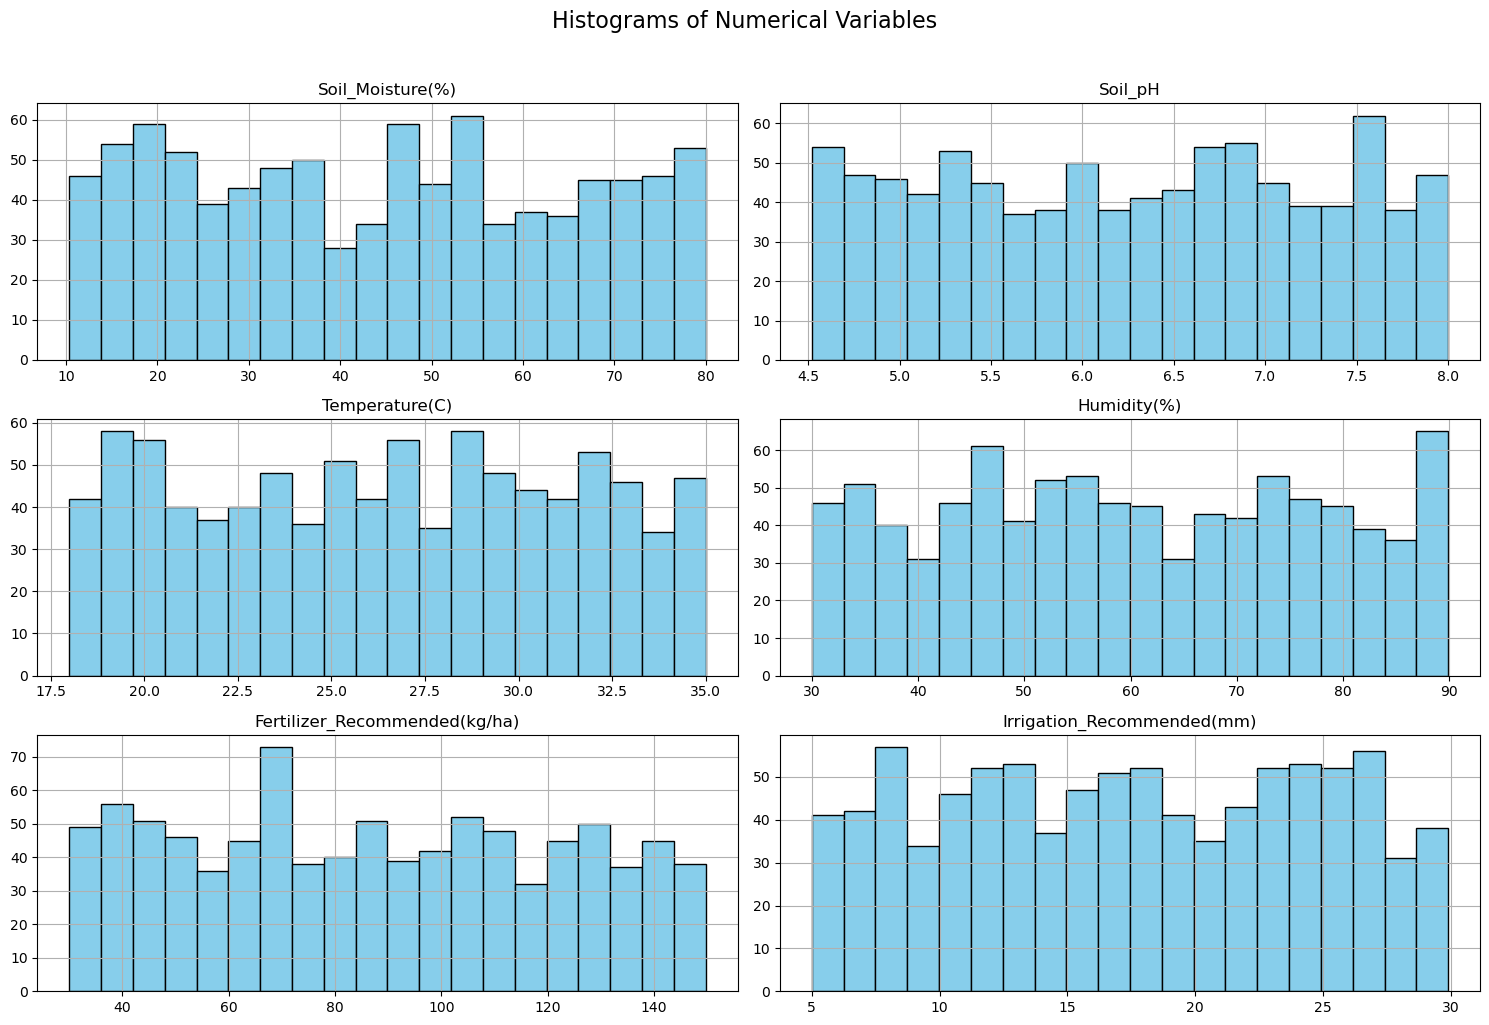

In [49]:
# Plot histograms for each numerical column
df[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()



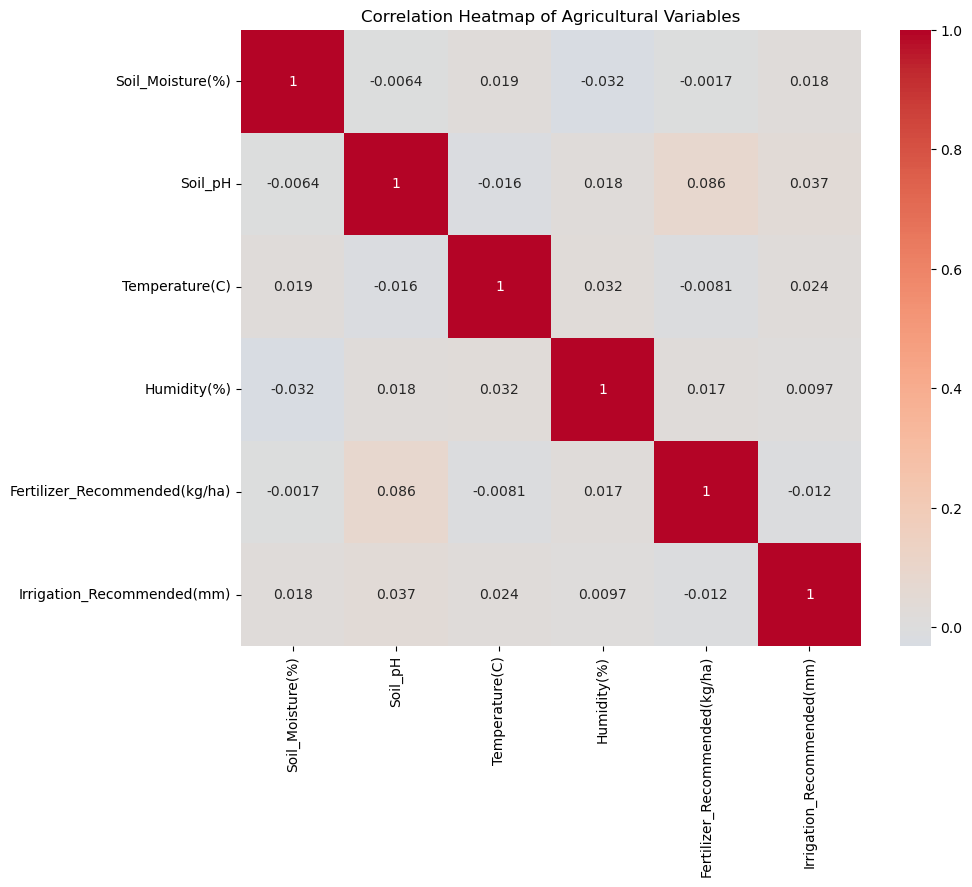

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Agricultural Variables')
plt.show()


In [50]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            913        913.000000  913.000000   
mean   2026-02-03 12:37:03.877327360         44.474014    6.255854   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-17 00:00:00         26.610000    5.330000   
50%              2026-02-01 00:00:00         45.185000    6.295000   
75%              2026-08-27 00:00:00         62.330000    7.100000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.570061    1.023586   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      913.000000   913.000000                     913.000000   
mean        26.405586    60.091566                      87.652245   
min         18.000000    30.000000                      30.000000   
25%         22.100000    45.900000                      58.500000   

In [ ]:
df.to_csv('cleaned_data.csv', index=False)  # Saves without row indices

# Assuming 'df' is your cleaned DataFrame
# Save to CSV (without index)
#df.to_csv('cleaned_agricultural_data.csv', index=False)

print("Dataset successfully saved as 'cleaned_agricultural_data.csv'")